# 1.데이터 불러오기

1. train.csv : 학습 데이터
        id : 샘플 아이디
        title : 제조사 모델명
        odometer : 주행 거리
        location : 판매처(나이지리아 도시)
        isimported : 현지 사용 여부
        engine : 엔진 종류
        transmission : 트랜스미션 종류
        fuel : 연료 종류
        paint : 페인트 색상
        year : 제조년도
        target : 자동차 가격




2. test.csv : 테스트 데이터
        id : 샘플 아이디
        title : 제조사 모델명
        odometer : 주행 거리
        location : 판매처(나이지리아 도시)
        isimported : 현지 사용 여부
        engine : 엔진 종류
        transmission : 트랜스미션 종류
        fuel : 연료 종류
        paint : 페인트 색상
        year : 제조년도


3. sample_submission.csv : 제출 양식
        id : 샘플 아이디
        target : 자동차 가격

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [85]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f'data set은 {train.shape[1]} 개의 feature를 가진 {train.shape[0]} 개의 데이터 샘플로 이뤄짐.')   # f가 없으면 그 상태로 출력

data set은 11 개의 feature를 가진 1015 개의 데이터 샘플로 이뤄짐.


In [86]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


In [87]:
train.info

<bound method DataFrame.info of         id                          title  odometer location    isimported  \
0        0                   Toyota RAV 4     18277   Lagos   Foreign Used   
1        1            Toyota Land Cruiser        10    Lagos          New    
2        2  Land Rover Range Rover Evoque     83091    Lagos  Foreign Used   
3        3                   Lexus ES 350     91524    Lagos  Foreign Used   
4        4                   Toyota Venza     94177    Lagos  Foreign Used   
...    ...                            ...       ...      ...           ...   
1010  1010                 Toyota Corolla     46768    Lagos  Foreign Used   
1011  1011                   Toyota Camry     31600    Abuja  Foreign Used   
1012  1012                   Toyota Camry     96802    Abuja  Foreign Used   
1013  1013                   Lexus GX 460    146275    Lagos  Foreign Used   
1014  1014                         DAF CF         0    Lagos  Locally used   

              engine transmissi

# 2.타겟 변수

**회귀 문제를 다룰때는 타겟 변수의 분포가 상당히 중요.**

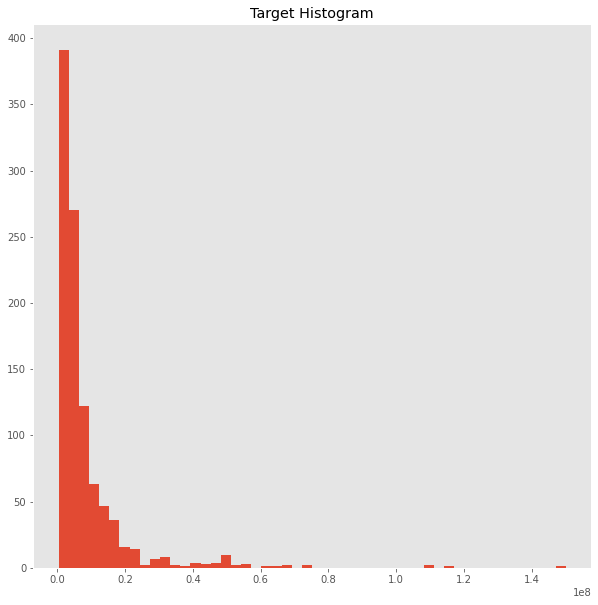

In [88]:
plt.figure(figsize = (10, 10))
plt.hist(train['target'], bins = 50)
plt.title('Target Histogram')
plt.grid()
plt.show()

여기서 target은 중고차의 가격으로 오른쪽으로 치우친 결과를 볼 수 있다. 물론, 비싼 가격의 중고차가 있다는 것은 충분히 이해할 수 있는 결과이므로 별도의 처리 없이 로그변환을 사용하여 정규분포와 가깝도록 변환시켜준다.

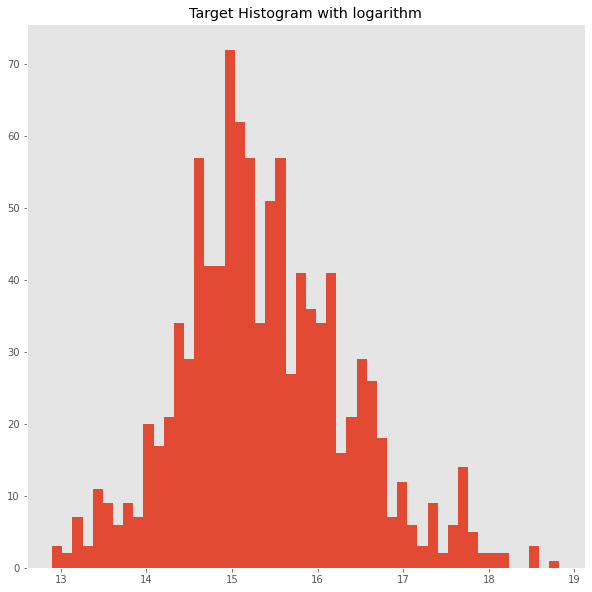

In [89]:
log_target = np.log(train['target'])          # target값을 log로 변환

plt.figure(figsize = (10, 10))
plt.hist(log_target, bins = 50)
plt.title('Target Histogram with logarithm')
plt.grid()
plt.show()

# 3.수치형 변수

수치형 변수 odometer(주행거리)와 year(제조년도)의 분포 확인

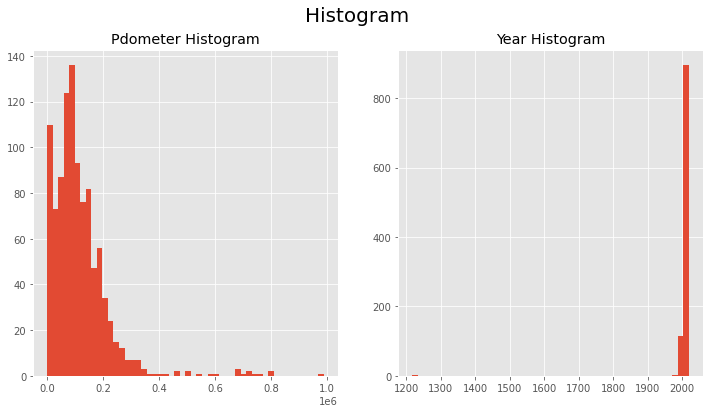

In [90]:
plt.style.use('ggplot')

plt.figure(figsize = (12, 6))
plt.suptitle('Histogram', fontsize = 20)

plt.subplot(1, 2, 1)
plt.hist(train.odometer, bins = 50)              # 데이터 안의 일부 컬럼을 그래프로 표현하기 위해서는 데이터.컬럼명으로 이용한다.
plt.title('Pdometer Histogram')

plt.subplot(1, 2, 2)
plt.hist(train.year, bins = 50)
plt.title('Year Histogram')
plt.show()

제작년도에서 1200년도의 차가 있다는 사실을 확인할 수 있다.

In [91]:
train[train['year'] < 1900]          # 데이터 안에서 찾고 싶은 조건은 [] 안에 넣어서 그에 맞는 데이터를 찾아낸다

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
415,415,Mercedes-Benz ATEGO,403461,Lagos,Locally used,4-cylinder(I4),manual,diesel,white,1218,6015000
827,827,Mercedes-Benz/52,510053,Lagos,Locally used,6-cylinder(V6),manual,diesel,white,1217,75015000


In [92]:
train[train['year'] > 2022]         # 2022년 보다 미래의 자동차 확인

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target


In [93]:
train = train[train['year'] > 1900]
train.info                                      # 1015에서 1013으로 제거된 것을 확인

<bound method DataFrame.info of         id                          title  odometer location    isimported  \
0        0                   Toyota RAV 4     18277   Lagos   Foreign Used   
1        1            Toyota Land Cruiser        10    Lagos          New    
2        2  Land Rover Range Rover Evoque     83091    Lagos  Foreign Used   
3        3                   Lexus ES 350     91524    Lagos  Foreign Used   
4        4                   Toyota Venza     94177    Lagos  Foreign Used   
...    ...                            ...       ...      ...           ...   
1010  1010                 Toyota Corolla     46768    Lagos  Foreign Used   
1011  1011                   Toyota Camry     31600    Abuja  Foreign Used   
1012  1012                   Toyota Camry     96802    Abuja  Foreign Used   
1013  1013                   Lexus GX 460    146275    Lagos  Foreign Used   
1014  1014                         DAF CF         0    Lagos  Locally used   

              engine transmissi

In [94]:
# index를 다시 설정
train = train.drop('id', axis = 1).reset_index().drop('index', axis = 1).reset_index().rename({'index':'id'}, axis = 'columns')

In [95]:
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000


# 4.통계치

In [96]:
data_description = train.describe().iloc[:, 1:3]
data_description

,odometer,year
count,1013.000000,1013.000000
mean,116171.015795,2009.946693
std,104147.052690,5.540466
min,0.000000,1980.000000
25%,55775.000000,2006.000000
50%,94803.000000,2010.000000
75%,152878.000000,2014.000000
max,987322.000000,2020.000000


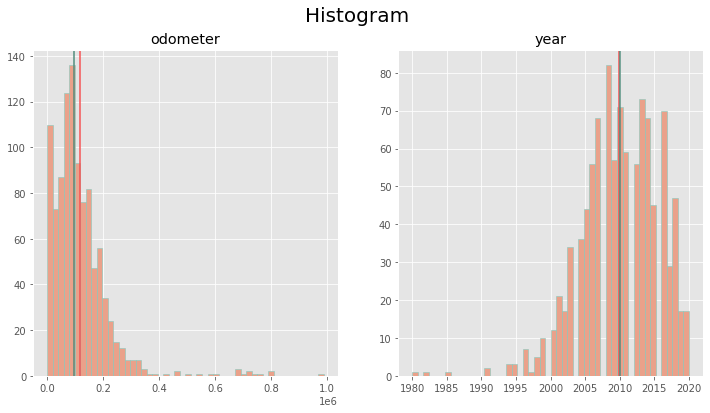

In [97]:
plt.style.use('ggplot')

plt.figure(figsize = (12, 6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1, 2, 1)
plt.hist(train['odometer'], bins = 50, color = '#eaa18a', edgecolor = '#7bcabf')
plt.title('odometer')
plt.axvline(data_description['odometer']['mean'], c='#f55354', label = f"mean = {round(data_description['odometer']['mean'], 2)}")
plt.axvline(data_description['odometer']['50%'], c='#518d7d', label = f"median = {round(data_description['odometer']['50%'], 2)}")

plt.subplot(1, 2, 2)
plt.hist(train['year'], bins = 50, color = '#eaa18a', edgecolor = '#7bcabf')
plt.title('year')
plt.axvline(data_description['year']['mean'], c='#f55354', label = f"mean = {round(data_description['year']['mean'], 2)}")
plt.axvline(data_description['year']['50%'], c='#518d7d', label = f"median = {round(data_description['year']['50%'], 2)}")
plt.show()

In [98]:
print('Odometer 평균은', round(data_description['odometer']['mean']), '입니다')
print('Odometer 중앙값은', round(data_description['odometer']['50%']), '입니다')

Odometer 평균은 116171 입니다
Odometer 중앙값은 94803 입니다


평균 주행거리는 116171, 중앙값은 94803으로 평균에 비해 중앙값이 좌측으로 치우쳐짐.

또한, 데이터 분포를 보면 좌편향 되어있는 것을 보아 주행거리가 데이터 평균에 비하여 매우 큰 값이 드물게 존재하는 것을 확인할 수 있다.

즉, 주핼거리 0 ~ 987322 사이 범위에서 비교적 적은 거리의 데이터가 많이 분포한다는 것을 확인할 수 있다.

In [99]:
print('Year 평균은', round(data_description['year']['mean']), '입니다')
print('Year 중앙값은', round(data_description['year']['50%']), '입니다')

Year 평균은 2010 입니다
Year 중앙값은 2010 입니다


평균 연식과 중앙값은 2010.

데이터 분포가 우편향 되어있는 것을 보아 연식이 데이터 평균에 비하여 매우 작은 값이 드물게 존재하는 것을 확인할 수 있다.

즉, 1980 ~ 2020 범위에서 비교적 최신 연도의 데이터가 많이 분포한다는 것을 확인할 수 있다.

# 5.타겟(가격)과 수치형 변수 상관관계 확인하기

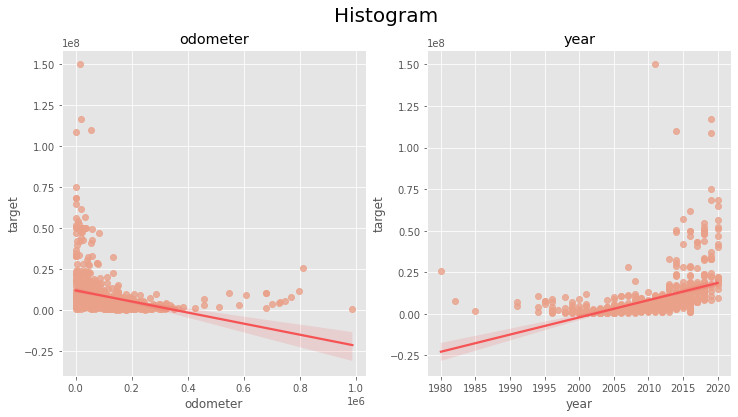

In [100]:
import seaborn as sns

plt.style.use('ggplot')

plt.figure(figsize = (12, 6))
plt.suptitle('Histogram', fontsize = 20)

plt.subplot(1, 2, 1)
sns.regplot(x = 'odometer', y = 'target', data = train, color = '#eaa18a', line_kws = {'color':'#f55354'})
plt.title('odometer')

plt.subplot(1, 2, 2)
sns.regplot(x = 'year', y = 'target', data = train, color = '#eaa18a', line_kws = {'color':'#f55354'})
plt.title('year')
plt.show()                                      # 추세선과 산점도 그래프

- 그래프를 통하여 target과 odometer 관계의 추세선을 확인해 보아 왼쪽 아래 방향을 향하고 있으므로 음의 상관관계를 가지고 있음을 도출
- 그래프를 통하여 target과 year 관계의 추세선을 확인해 보아 왼쪽 위 방향을 향하고 있으므로 양의 상관관계를 가지고 있음을 도출

# 6.히트맵 그리기

In [101]:
from sklearn.preprocessing import MinMaxScaler

train_corr = train[['odometer', 'year', 'target']]
scaler = MinMaxScaler()
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method = 'pearson')                                               # corr = 상관계수

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


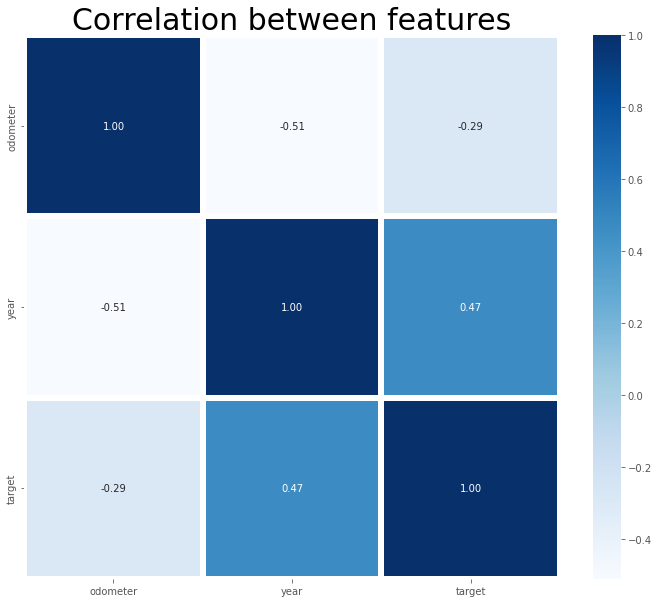

In [102]:
plt.figure(figsize = (12, 10))
sns.heatmap(data = corr28, annot = True, fmt = '.2f', linewidths = 5, cmap = 'Blues')
plt.title('Correlation between features', fontsize = 30)
plt.show()

In [103]:
# target과 피텨들의 상관관계
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['target'].sort_values(ascending = False), columns = ['target'])
df_temp28.style.background_gradient(cmap = 'viridis')

,target
target,1.000000
year,0.468276
odometer,-0.287731


- 그래프를 보니 year가 높은 양의 상관관계가 있는 것으로 나타났다. 이는 최근 연도일수록 가격이 높아진다는 것으로 해석할 수 있다.
- 또한 odometer도 -0.29로 음의 상관관계를 띄므로 전반적으로 주행거리가 많을수록 가격이 낮아질 것이라 해석할 수 있다.

# 7.범주형 변수

describe에 include = 'object'를 주면 범주형 변수 count, unique, top, freq 통계치를 얻을 수 있다.

In [104]:
train.describe(include = 'object')

,title,location,isimported,engine,transmission,fuel,paint
count,1013,1013,1013,1013,1013,1013,1013
unique,201,13,3,8,2,2,76
top,Toyota Camry,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black
freq,129,790,744,617,965,970,292


unique 행을 보면 title(210)과 paint(76)의 카테고리가 매우 많이 있는 것으로 확인

이 와중에, 가장 많은 title이 Toyota Camry 차로 129대가 있다는 것을 알 수 있다.

또한, paint는 Black의 색상으로 292대가 있다.

In [105]:
train.describe(include = 'object').columns

Index(['title', 'location', 'isimported', 'engine', 'transmission', 'fuel',
       'paint'],
      dtype='object')

# 8.파생변수 생성

수십개의 카테고리를 같은 카테고리로 뭉쳐 파생변수를 만들 수 있는지 데이터 탐색

In [106]:
train['title'].value_counts()[:20]

Toyota Camry            129
Toyota Corolla          108
Toyota Highlander        50
Toyota Sienna            49
Toyota RAV 4             40
Honda Accord             38
Lexus RX 350             33
Lexus ES 350             24
Toyota Venza             16
Lexus GX 460             16
Honda Pilot              15
Lexus LX 570             14
Mercedes-Benz ML 350     13
Toyota Avalon            13
Mercedes-Benz GL 450     12
Toyota Matrix            12
Toyota Tacoma            12
Ford Explorer            12
Mercedes-Benz E 350      12
Toyota 4-Runner          12
Name: title, dtype: int64

도요타, 혼다, 렉서스, 벤츠 등 title 변수를 통하여 상위 변수로 Brand 변수도 생성해 낼 수 있을 것 같음.(브랜드 멸 카테고리 변수도 추가해주면 분석에 용이 할 것 같다.)

In [107]:
train['brand'] = train['title'].apply(lambda x : x.split(' ')[0])          # 브랜드만 뽑아내어 데이터에 추가
train.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,target,brand
0,0,Toyota RAV 4,18277,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Red,2016,13665000,Toyota
1,1,Toyota Land Cruiser,10,Lagos,New,4-cylinder(I4),automatic,petrol,Black,2019,33015000,Toyota
2,2,Land Rover Range Rover Evoque,83091,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2012,9915000,Land
3,3,Lexus ES 350,91524,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Gray,2007,3815000,Lexus
4,4,Toyota Venza,94177,Lagos,Foreign Used,6-cylinder(V6),automatic,petrol,Red,2010,7385000,Toyota


In [108]:
train['brand'].value_counts().head()

Toyota           474
Lexus            122
Mercedes-Benz    104
Honda             81
Ford              36
Name: brand, dtype: int64

In [109]:
print('title의 unique 카테고리 개수 : ', len(train['title'].value_counts()))
print('brand의 unique 카테고리 개수 : ', len(train['brand'].value_counts()))

title의 unique 카테고리 개수 :  201
brand의 unique 카테고리 개수 :  41


201개의 카테고리에서 41개 카테고리로 줄어든 새로운 brand 파생변수를 생성

그래도 카테고리의 수가 많다.

# 9.데이터 정제

In [110]:
train['paint'].value_counts()[:20]

Black        292
White        115
Silver       103
Grey          84
Blue          70
Red           53
Dark Grey     47
Gold          37
white         24
Green         18
Gray          17
Brown         16
Black         15
Dark Blue     14
Wine           8
Silver         5
Sliver         5
blue           5
red            5
Grey           3
Name: paint, dtype: int64

In [111]:
# paint의 컬럼에 띄어쓰기, 대소문자가 고르지 못하기 때문에 정규표현식을 사용하여 통일성을 맞춤
import re

def clean_text(texts):
    corpus = []

    for i in range(len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

In [112]:
temp = clean_text(train['paint'])
train['paint'] = temp

In [113]:
print('brand의 unique 카테고리 개수 : ', len(train['paint'].unique()))

brand의 unique 카테고리 개수 :  51


In [114]:
train['paint'].value_counts()[:20]

black        310
white        142
silver       109
grey          87
blue          78
red           58
dark grey     48
gold          41
green         20
gray          18
dark blue     17
brown         16
wine           9
sliver         5
dark ash       4
cream          4
ash            3
purple         3
yellow         3
whiteblue      2
Name: paint, dtype: int64

In [115]:
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
train['paint'] = train['paint'] = train['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)

스펠링 오타와 색상의 명도 및 채도를 포함한 색이 있기 때문에 오타를 수정해주고 대표할 수 있는 색상으로 글자를 바꿔주기

In [116]:
train['paint'].value_counts()

black     312
grey      159
white     146
silver    117
blue      105
red        60
gold       42
green      21
brown      17
wine       10
ash         8
cream       4
purple      3
yellow      3
milk        2
maroon      2
beige       1
orange      1
Name: paint, dtype: int64

In [117]:
print('paint의 unique 카테고리 개수 : ', len(train['paint'].value_counts()))

paint의 unique 카테고리 개수 :  18


카테고리의 수를 처음 76개에서 18개로 줄인 것을 확인

# 10.히스토그램

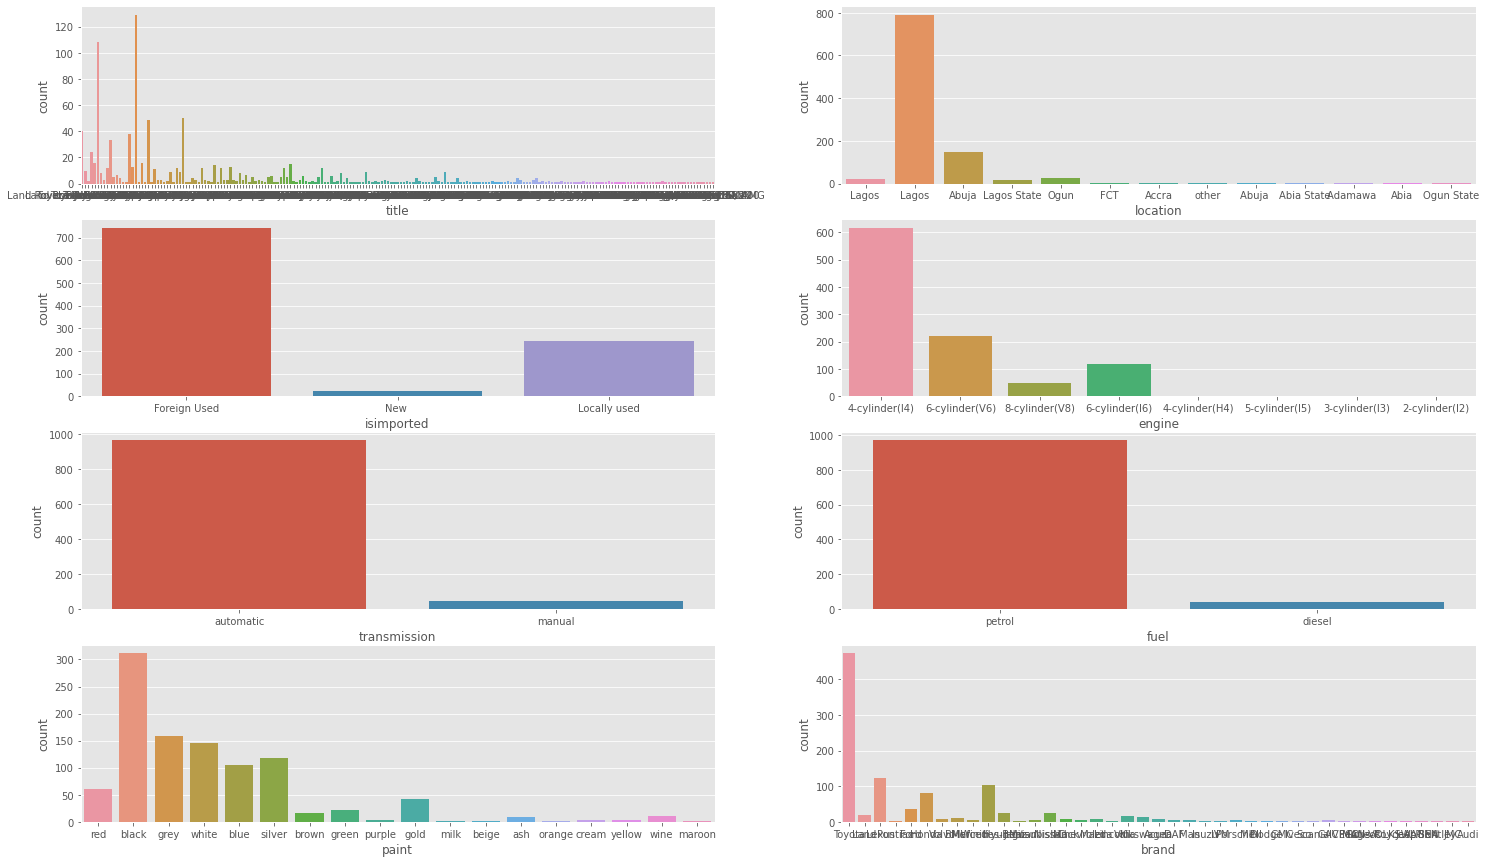

In [118]:
plt.style.use('ggplot')

plt.figure(figsize = (25, 15))
count = 1

for i in train.describe(include = 'object').columns:
    plt.subplot(4, 2, count)
    sns.countplot(data = train, x = i)
    count += 1

아직 title과 brand에서 unique의 카테고리가 많아서 알아보기 힘들다.

In [119]:
train_title10 = train[train['title'].apply(lambda x : x in train['title'].value_counts()[:10].keys())]
train_brand10 = train[train['brand'].apply(lambda x : x in train['brand'].value_counts()[:10].keys())]

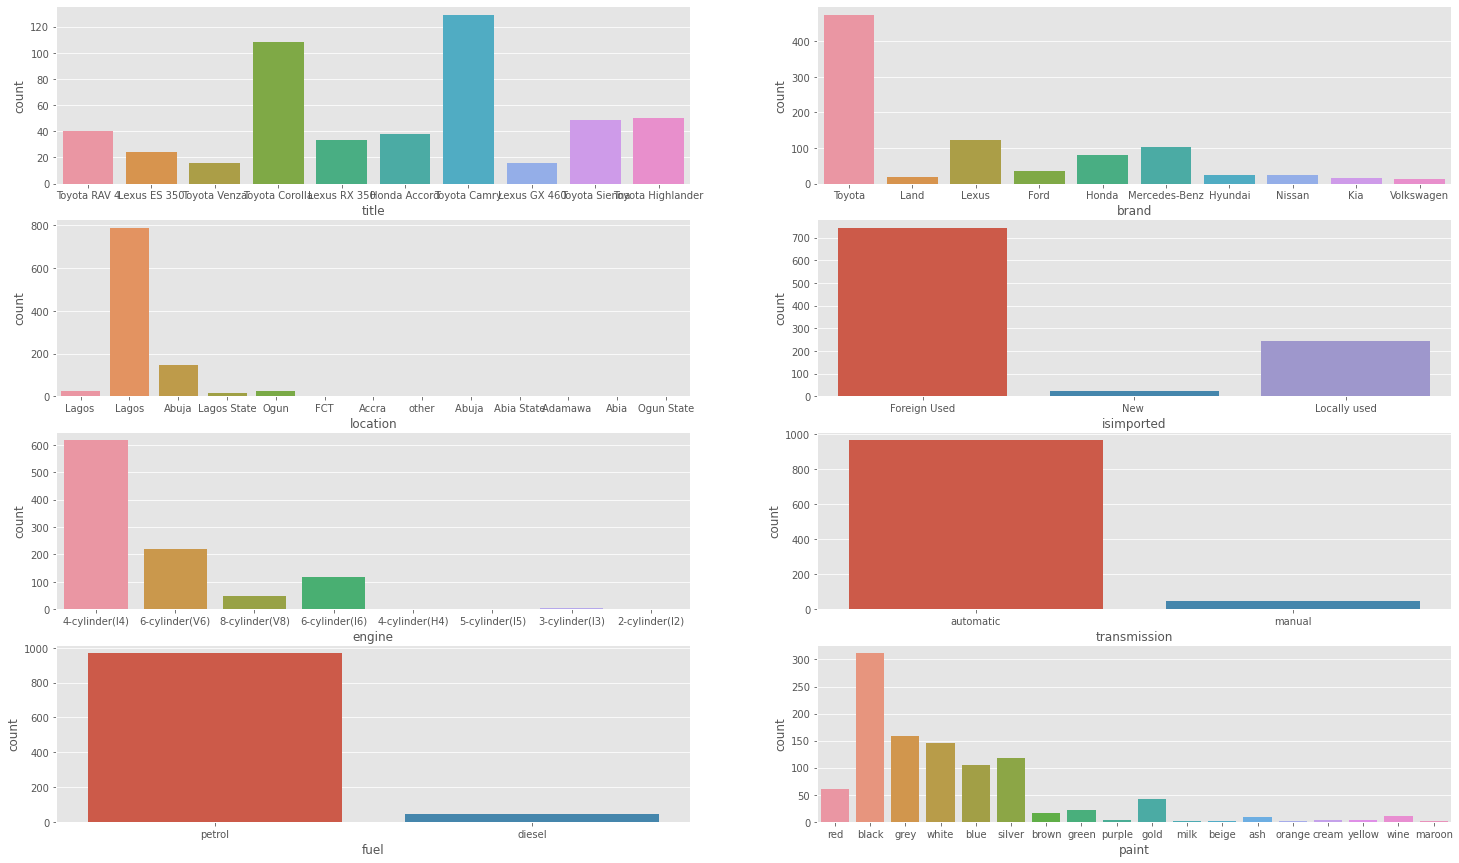

In [120]:
plt.style.use("ggplot")

plt.figure(figsize=(25,15))
plt.subplot(4,2,1)
sns.countplot(data=train_title10, x='title')
plt.subplot(4,2,2)
sns.countplot(data=train_brand10, x='brand')
count = 3

for i in train.describe(include="object").columns.drop(['title'])[:-1]:
    plt.subplot(4,2,count)
    sns.countplot(data=train, x=i)
    count += 1

- title과 brand에서 Toyota가 압도적으로 중고차가 많다는 것을 확인
- location에서 Lagos 지역이 압도적으로 중고차가 많다는 것을 확인
- isimported에서 New 차는 적고, Foreign Used > Locally used > New 순서로 중고차 대수가 이루어진다는 것을 확인
- engine에서 4-cylinder가 압도적으로 중고차가 많다는 것을 확인
- trainsmission에서 automatic가 압도적으로 중고차가 많다는 것을 확인
- fuel에서 petrol가 압도적으로 중고차가 많다는 것을 확인
- paint에서 black > grey > white > sliver > red > gold ... 순으로 중고차가 대수가 이루어지는 것을 확인
-   이를 통하여 isimported, transmission, fuel 등 몇몇 피쳐들이 데이터가 불균형이 심한 것을 확인할 수 있었습니다. 따라서 몇몇 피쳐들을 가지고 모델이 정답값인 중고차 가격을 잘 맞추기엔 '경험'이 부족할 수 있을것 같습니다.
따라서 이 문제를 해결하기 위하여 부족한 데이터를 증강, Stratified Fold을 나누어 데이터의 분포를 같게 학습시키는 등의 방법을 이용하는 것도 좋은 접근방법이 될 것 같습니다.

# 11.Violin plot

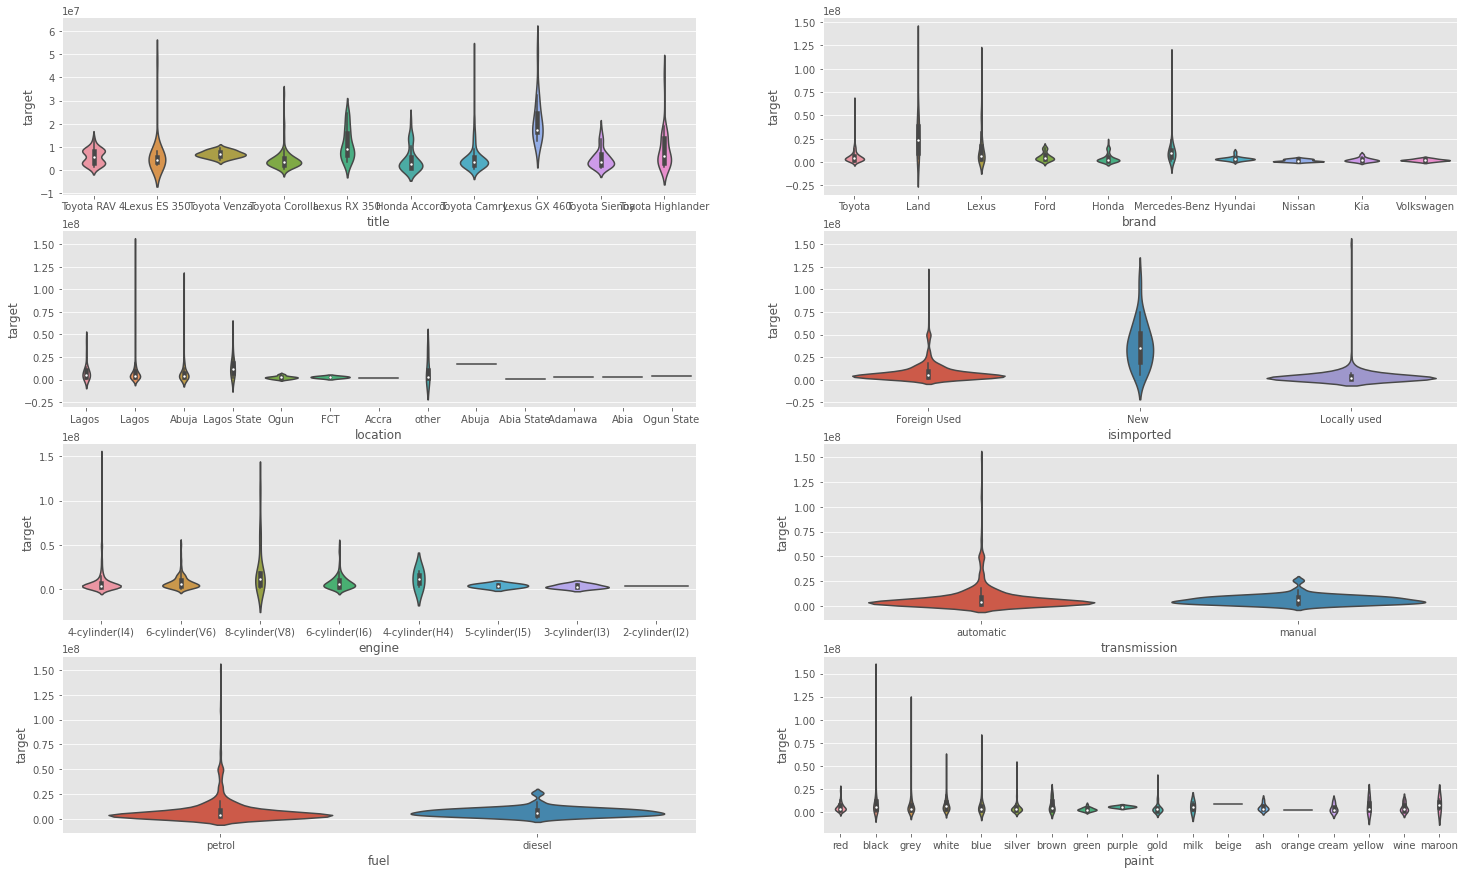

In [121]:
plt.style.use("ggplot")

plt.figure(figsize=(25,15))
plt.subplot(4,2,1)
sns.violinplot(data=train_title10, x='title', y ='target')
plt.subplot(4,2,2)
sns.violinplot(data=train_brand10, x='brand', y ='target')
count = 3

for i in train.describe(include="object").columns.drop(['title'])[:-1]:
    plt.subplot(4,2,count)
    sns.violinplot(data=train, x=i, y ='target')
    count += 1

- title과 brand에서 Land, Lexus Benz가 높은 가격대를 형성하고 있다는 것을 확인
- location에서 Lagos, Abuja가 높은 가격대를 형성하고 있다는 것을 확인
- isimported에서 New가 높은 가격대를 형성하고 있다는 것을 확인
- engine에서 4-cylinder와 8-cylinder가 높은 가격대를 형성하고 있다는 것을 확인
- trainsmission에서 automatic가 높은 가격대를 형성하고 잇다는 것을 확인
- fuel에서 petrol가 높은 가격대를 형성하고 있다는 것을 확인
- paint에서 black > grey > bule가 높은 가격대를 형성하고 있다는 것을 확인

-   데이터 불균형이 심한 new, automatic, petrol은 아무래도 데이터가 많은쪽이 분포가 넓다고 해석할 수 있으니 조금 더 조심히 살펴보아야 할 속성인 것 같습니다.
그리고 engine, transmission, fuel, paint에서 Vilolin plot 분포의 확률 밀도가 가장 큰 곳의 높낮이가 비슷한 것을 보아 대체적으로 카테고리들의 분포의 최빈값은 피쳐별로 비슷하게 형성되어있는 것 같습니다.

In [122]:
train.to_csv('train_re.csv', index = False)

# 12.test 데이터 전처리

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
test = pd.read_csv('test.csv')
test.info

<bound method DataFrame.info of       id                  title  odometer location    isimported  \
0      0    Mercedes-Benz C 300      1234    Abuja          New    
1      1           Honda Accord     29938    Abuja  Foreign Used   
2      2    Mercedes-Benz S 550     87501    Lagos  Foreign Used   
3      3          Toyota Sienna    180894    Lagos  Locally used   
4      4           Toyota Hiace    104814    Lagos  Foreign Used   
..   ...                    ...       ...      ...           ...   
431  431  Mercedes-Benz GLK 350     78175    Lagos  Foreign Used   
432  432        Honda Crosstour    129223    Lagos  Foreign Used   
433  433   Mercedes-Benz ML 350    100943    Lagos  Foreign Used   
434  434           Lexus GX 470     81463    Lagos  Foreign Used   
435  435          Toyota Sienna       646    Lagos  Foreign Used   

             engine transmission    fuel       paint  year  
0    4-cylinder(I4)    automatic  petrol       White  2017  
1    4-cylinder(I4)    automa

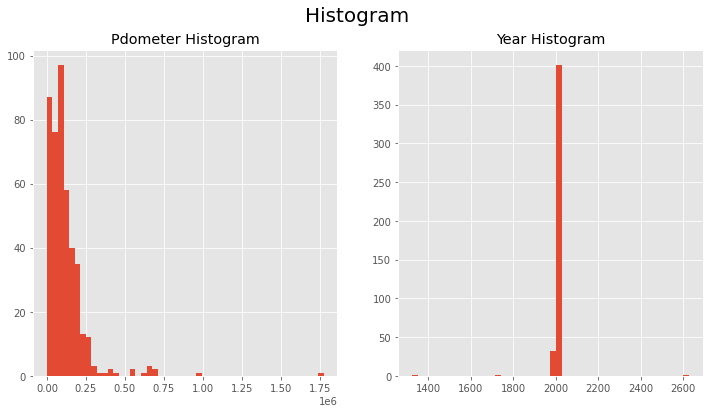

In [125]:
plt.style.use('ggplot')

plt.figure(figsize = (12, 6))
plt.suptitle('Histogram', fontsize = 20)

plt.subplot(1, 2, 1)
plt.hist(test.odometer, bins = 50)              # 데이터 안의 일부 컬럼을 그래프로 표현하기 위해서는 데이터.컬럼명으로 이용한다.
plt.title('Pdometer Histogram')

plt.subplot(1, 2, 2)
plt.hist(test.year, bins = 50)
plt.title('Year Histogram')
plt.show()

In [126]:
# test[test['year'] < 1900]

In [127]:
# test[test['year'] > 2022]

In [128]:
# test = test[test['year'] > 1900]
# test = test[test['year'] < 2022]
# test.info 

In [129]:
# index를 다시 설정
# test = test.drop('id', axis = 1).reset_index().drop('index', axis = 1).reset_index().rename({'index':'id'}, axis = 'columns')

In [130]:
test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,White,2013
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2012
3,3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Dark Grey,2001
4,4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,White,2000


In [131]:
test_data_description = test.describe().iloc[:, 1:3]
test_data_description

,odometer,year
count,4.360000e+02,436.000000
mean,1.167091e+05,2009.080275
std,1.376658e+05,46.582869
min,0.000000e+00,1324.000000
25%,4.760675e+04,2006.000000
50%,8.977550e+04,2010.000000
75%,1.512712e+05,2014.000000
max,1.775588e+06,2626.000000


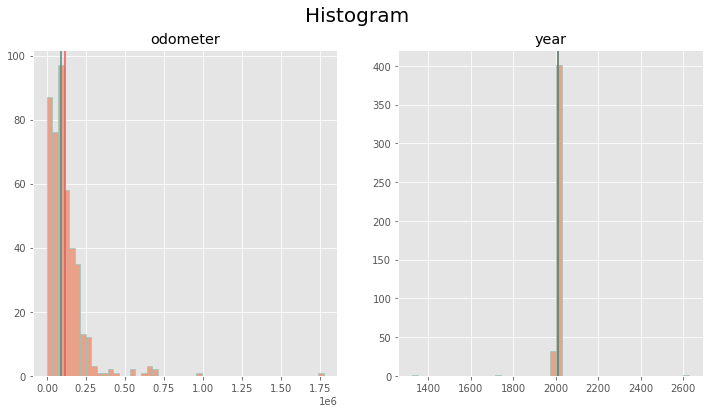

In [132]:
plt.style.use('ggplot')

plt.figure(figsize = (12, 6))
plt.suptitle("Histogram", fontsize=20)

plt.subplot(1, 2, 1)
plt.hist(test['odometer'], bins = 50, color = '#eaa18a', edgecolor = '#7bcabf')
plt.title('odometer')
plt.axvline(test_data_description['odometer']['mean'], c='#f55354', label = f"mean = {round(test_data_description['odometer']['mean'], 2)}")
plt.axvline(test_data_description['odometer']['50%'], c='#518d7d', label = f"median = {round(test_data_description['odometer']['50%'], 2)}")

plt.subplot(1, 2, 2)
plt.hist(test['year'], bins = 50, color = '#eaa18a', edgecolor = '#7bcabf')
plt.title('year')
plt.axvline(test_data_description['year']['mean'], c='#f55354', label = f"mean = {round(test_data_description['year']['mean'], 2)}")
plt.axvline(test_data_description['year']['50%'], c='#518d7d', label = f"median = {round(test_data_description['year']['50%'], 2)}")
plt.show()

In [133]:
test.describe(include = 'object')

,title,location,isimported,engine,transmission,fuel,paint
count,436,436,436,436,436,436,436
unique,124,11,3,8,2,2,46
top,Toyota Corolla,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black
freq,52,338,321,278,414,416,118


In [134]:
test.describe(include = 'object').columns

Index(['title', 'location', 'isimported', 'engine', 'transmission', 'fuel',
       'paint'],
      dtype='object')

In [135]:
test['title'].value_counts()[:20]

Toyota Corolla           52
Toyota Camry             52
Toyota Highlander        30
Toyota Sienna            29
Toyota RAV 4             19
Honda Accord             16
Lexus RX 350             15
Lexus GX 460             10
Lexus LX 570              9
Lexus ES 350              8
Toyota Venza              8
Toyota Matrix             7
Honda Civic               6
Hyundai Sonata            6
Toyota Avalon             6
Mercedes-Benz GLK 350     6
Mercedes-Benz C 300       5
Toyota Hiace              4
Toyota 4-Runner           4
Hyundai Elantra           3
Name: title, dtype: int64

In [136]:
test['brand'] = test['title'].apply(lambda x : x.split(' ')[0])          # 브랜드만 뽑아내어 데이터에 추가
test.head()

,id,title,odometer,location,isimported,engine,transmission,fuel,paint,year,brand
0,0,Mercedes-Benz C 300,1234,Abuja,New,4-cylinder(I4),automatic,petrol,White,2017,Mercedes-Benz
1,1,Honda Accord,29938,Abuja,Foreign Used,4-cylinder(I4),automatic,petrol,White,2013,Honda
2,2,Mercedes-Benz S 550,87501,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,Black,2012,Mercedes-Benz
3,3,Toyota Sienna,180894,Lagos,Locally used,6-cylinder(V6),automatic,petrol,Dark Grey,2001,Toyota
4,4,Toyota Hiace,104814,Lagos,Foreign Used,4-cylinder(I4),automatic,petrol,White,2000,Toyota


In [137]:
test['brand'].value_counts().head()

Toyota           225
Lexus             54
Mercedes-Benz     42
Honda             34
Hyundai           11
Name: brand, dtype: int64

In [138]:
test['paint'].value_counts()[:20]

Black         118
Silver         62
White          45
Red            36
Grey           30
Blue           27
white          16
Dark Grey      14
Gray           13
Gold            9
Green           8
Brown           5
Black           4
Dark Blue       4
Dark Green      3
Yellow          3
Blue            3
green           3
Ash             2
Wine            2
Name: paint, dtype: int64

In [139]:
# paint의 컬럼에 띄어쓰기, 대소문자가 고르지 못하기 때문에 정규표현식을 사용하여 통일성을 맞춤
import re

def clean_text(texts):
    corpus = []

    for i in range(len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>\<]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
        review = re.sub(r'\d+','',review)#숫자 제거
        review = review.lower() #소문자 변환
        review = re.sub(r'\s+', ' ', review) #extra space 제거
        review = re.sub(r'<[^>]+>','',review) #Html tags 제거
        review = re.sub(r'\s+', ' ', review) #spaces 제거
        review = re.sub(r"^\s+", '', review) #space from start 제거
        review = re.sub(r'\s+$', '', review) #space from the end 제거
        review = re.sub(r'_', ' ', review) #space from the end 제거
        #review = re.sub(r'l', '', review)
        corpus.append(review) 
        
    return corpus

In [140]:
temp_test = clean_text(test['paint'])
test['paint'] = temp_test

In [141]:
print('brand의 unique 카테고리 개수 : ', len(test['paint'].unique()))

brand의 unique 카테고리 개수 :  30


In [142]:
test['paint'].value_counts()[:20]

black         124
silver         63
white          61
red            36
grey           32
blue           31
dark grey      14
gray           13
green          12
gold           11
brown           6
dark blue       5
yellow          3
dark green      3
sliver          3
cream           2
light grey      2
wine            2
ash             2
navy blue       1
Name: paint, dtype: int64

In [143]:
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'blue' if x.find('blue') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'red' if x.find('red') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'green' if x.find('green') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'white' if x.find('white') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('grey') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gery') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'grey' if x.find('gray') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'ash' if x.find('ash') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'brown' if x.find('brown') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('silver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'silver' if x.find('sliver') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'black' if x.find('black') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'gold' if x.find('gold') >= 0 else x)
test['paint'] = test['paint'] = test['paint'].apply(lambda x : 'wine' if x.find('whine') >= 0 else x)

In [144]:
test['paint'].value_counts()

black               124
silver               67
grey                 62
white                61
blue                 37
red                  36
green                17
gold                 11
brown                 6
yellow                3
ash                   3
cream                 2
wine                  2
maroon                1
blac                  1
golf                  1
indigo ink pearl      1
beige                 1
Name: paint, dtype: int64

In [145]:
print('paint의 unique 카테고리 개수 : ', len(test['paint'].value_counts()))

paint의 unique 카테고리 개수 :  18


In [146]:
test.to_csv('test_re.csv', index = False)